In [39]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
from sklearn.cluster import KMeans
import numpy as np

In [40]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/exps/painsA_noclust/extra/KFKUHRDIQZWKPK-UHFFFAOYSA-N_Sp2-sp2_Suzuki_coupling_r1_1of1.csv', index_col=0)
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kate_fieseler/PycharmProjects/syndirella/exps/painsA_noclust/extra/KFKUHRDIQZWKPK-UHFFFAOYSA-N_Sp2-sp2_Suzuki_coupling_r1_1of1.csv'

In [41]:
# Load your molecules here (This is just a placeholder example)
smiles = list(df['r1_smiles'])
df = pd.DataFrame(smiles, columns=['SMILES'])
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES')

# Calculate Morgan Fingerprints
fp_list = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=166) for mol in df['ROMol']]

# Convert fingerprints to a NumPy array for KMeans
fp_array = np.array([list(fp) for fp in fp_list])

# Number of clusters (set this variable)
n_clusters = 3

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(fp_array)

# Display the DataFrame
PandasTools.ChangeMoleculeRendering(df)
df

NameError: name 'df' is not defined

In [42]:
df

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem, PandasTools
from sklearn.cluster import MiniBatchKMeans
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.DataFrame({'SMILES': ['CCO', 'CCC', 'CCN', 'CCO', 'CNO']})  # Replace with your actual data
num_clusters = 3
outfile_name = 'clusters.csv'
sample_size = None


In [ ]:

# Add RDKit molecules to DataFrame
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule')

# Calculate Morgan Fingerprints
df['Fingerprint'] = df['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=166))

# Prepare data for clustering
fps = np.array(list(df['Fingerprint']), dtype=np.float16)

# Sampling if necessary
if sample_size and len(fps) > sample_size:
    train_fps = fps[np.random.choice(fps.shape[0], sample_size, replace=False)]
else:
    train_fps = fps

# KMeans Clustering
start = time.time()
print(start)
km = MiniBatchKMeans(n_clusters=num_clusters, random_state=0, batch_size=3 * num_clusters)
km.fit(train_fps)

# Assign clusters to full data
df['Cluster'] = km.predict(fps)

elapsed = time.time() - start
print(f"Clustered {len(fps)} molecules into {num_clusters} clusters in {elapsed:.1f} sec")

# Save to CSV
df[['SMILES', 'Cluster']].to_csv(outfile_name, index=False)

# Optional: Display using PandasTools
PandasTools.ChangeMoleculeRendering(df)

In [ ]:
mol = Chem.MolFromSmiles('C[C@](N)(F)c1ccccc1 |a:1|')
mol

In [ ]:
mol2 = Chem.MolFromSmiles('CC(N)(F)c1ccccc1')
mol2

In [ ]:
mol_list = [mol, mol2]


In [ ]:
mol.HasProp('_ChiralityPossible')

In [ ]:
[mol for mol in mol_list for atom in mol.GetAtoms() if atom.GetChiralTag() != Chem.rdchem.ChiralType.CHI_UNSPECIFIED]


In [ ]:
non_chiral = [mol for mol in mol_list if all(atom.GetChiralTag() == Chem.rdchem.ChiralType.CHI_UNSPECIFIED for atom in mol.GetAtoms())]


In [ ]:
non_chiral[0]

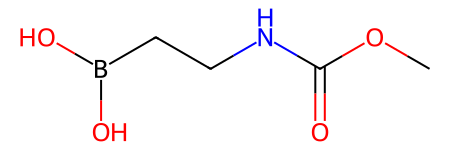

In [43]:
# check smarts
mol = Chem.MolFromSmiles('COC(=O)NCCB(O)O')
mol

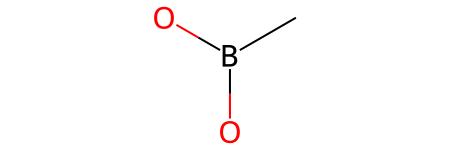

In [48]:
smarts = Chem.MolFromSmarts("[#6]-[#5](-[#8])(-[#8])")
smarts

In [49]:
mol.HasSubstructMatch(smarts)

True

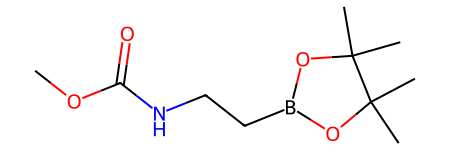

In [61]:
mol = Chem.MolFromSmiles('COC(=O)NCCB1OC(C)(C)C(C)(C)O1')
mol

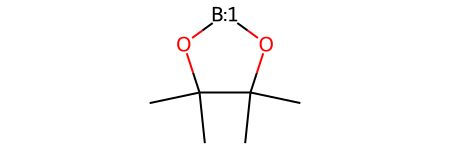

In [57]:
to_add = Chem.MolFromSmarts('[#6]-[#6]1(-[#6])-[#8]-[#5]-[#8]-[#6]-1(-[#6])-[#6]')
to_add

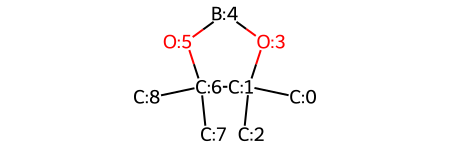

In [58]:
# get atom nums
for i, atom in enumerate(to_add.GetAtoms()):
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
to_add